# Workshop 2: Quality Control (QC)
Preparing and filtering data for genome-wide association studies.

> Kostas Hatzikotoulas (hatzikotoulas@helmholtz-muenchen.de)

> Xenofon Giannoulis (xenofon.giannoulis@helmholtz-muenche.de)

# Objectives

In this workshop, you will learn the data quality assessment and control steps that are typically carried out during genome wide association studies (GWAS).

## Prerequisites
For this practical workshop, we need the following software:
- [PLINK](https://www.cog-genomics.org/plink/) for data management
- [R](https://www.r-project.org/) for visualization of different QC measures



## Distinguish R Python and Bash Shells

> Since this a python configured notebook, we import the basic packages to intergrate bash and R. Please make sure that you notice the following differences:

- when a command starts with `!`, this is a linux command writen in bash (for managing directories and executing plink commands)

- when a shell starts with `%%R` the code follows is written in R


## Why do we need the QC?

Study design and errors in genotype calling can introduce systematic biases into GWAS, leading to spurious associations. A thorough QC can help us identify samples and markers that should be removed prior to association analysis in order to minimize the number of false-positive and false-negative associations.

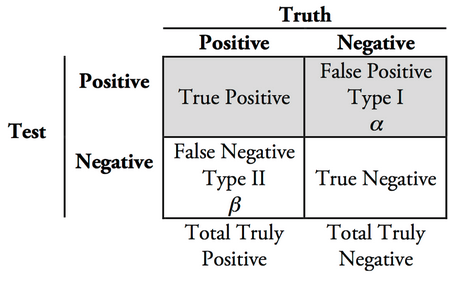

In this tutorial, we assume that the study design has been conducted appropriately and the QC applies to the genotypes after they have been called from probe intensity data.

QC protocol The QC protocol of a GWAS is usually split into two broad categories, ***Sample QC*** and ***Variant QC***.

Sample QC is done prior to Variant QC because we want to maximise the number of markers remaining in the study.

## Sample QC

It consists of (at least) five steps:

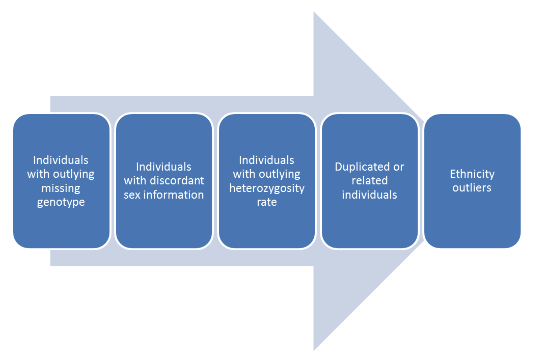

# Data, Directories & Libraries


## Google Drive

Let us set up the connection with Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

We set up the file paths to the respective directories.

In [ ]:
# this is the file path to your google drive (/content/drive/My Drive/) followed up by the data path
dir_path='/content/drive/My Drive/Complex_Traits/2_Workshop_Quality_Control/data/'
dir_scripts="/content/drive/My Drive/Complex_Traits/2_Workshop_Quality_Control/scripts/"


## Packages

Install the rpy2 package that allows us to run R from a python notebook

In [ ]:
!pip install "pandas<2.0.0"
!pip install rpy2==3.1.0

Import necessary libraries

In [ ]:
import os # python related package to list files in the defined directory
import rpy2.ipython
%load_ext rpy2.ipython

In [ ]:
%%R
dir_path = '/content/drive/My Drive/Complex_Traits/2_Workshop_Quality_Control/data'
setwd(paste0(dir_path))

In [ ]:
%%bash
pwd

Check the contents of the current path

In [ ]:
%%bash
ls

In [ ]:
ls -lrt

In [ ]:

ls "/content/drive/My Drive/Complex_Traits/2_Workshop_Quality_Control/scripts"

## If Linux/Windows/Mac

If working on your local machine, or a remote server environment you will want to start any project by creating and defining your working directory in a variable name, such as:
```
mkdir your_directory_name
```
- where `your_directory_name` can be named as `QC`

```
DIR="path_to/your_directory_name"
```

- where `path_to` represents the directory until the folder we have just created
- `DIR` represents the variable where we store the complete path for the analysis (i.e `DIR=~/QC`)

In our case, we are using this notebook where no terminal is needed for execution of any commands, but there is a virtual directory for each user where we can download the data from github using `wget`, and run plink sofware with `!./plink`


## Downloading PLINK software

In [ ]:
!wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20210606.zip && unzip plink_linux_x86_64_20210606.zip && rm prettify toy.* LICENSE
!rm *.zip

- Quickly test that plink sofware command is executable on bash
> you should be able to see all available flags (options) plink has for data processing.

In [ ]:
!./plink

## Basic Plink Commands

### Step 1: Remove Individuals with outlying missing genotype

In [ ]:
# ignore this cell, can be used only if you cannot download the data and the drive ~ if connection is not working
#!wget -O data https://ascgitlab.helmholtz-muenchen.de/xenofon.giannoulis/VolosSummerSchool/-/tree/master/VSS_2019/Workshop2_QC

In [ ]:
# define th file we will be working on:
FILE="VSS"

In [ ]:
# 1.1 Generate a list genotyping/missingness rate statistics
!./plink --bfile $FILE --missing --out $FILE-missing

In [ ]:
# 1.2 Produce a log file giving samples excluded at Call Rate 0.98 to check against R result

# removing individuals with high missing genotype rates

!./plink --bfile $FILE --mind 0.02 --make-bed --out $FILE-mind0.02


### Step 2: Individuals with discordant sex information

In [ ]:
# 2.1 Run sex checking

# use !./plink to run sex check and export your cleaned file as $FILE-sexcheck



In [ ]:
#@title solution
# 2.1 Run sex checking

!./plink --bfile $FILE --check-sex --out $FILE-sexcheck


In [ ]:
# 2.2 Extract xchr SNPs

# use !./plink to Extract xchr SNPs and export your cleaned file as $FILE-xchr




In [ ]:
!./plink --bfile $FILE --chr 23 --make-bed --out $FILE-xchr

In [ ]:
#@title Solution
# 2.2 Extract xchr SNPs

!./plink --bfile $FILE --chr 23 --make-bed --out $FILE-xchr


In [ ]:
!ls -lrt

In [ ]:
# 2.3 Run missingness on xchr SNPs

# use !./plink to Run missingness on xchr SNPs and export your cleaned file as $FILE-xchr-missing

!./plink --bfile $FILE-xchr --missing --make-bed --out $FILE-xchr-missing


In [ ]:
!ls -lrt | tail -5

In [ ]:
#@title Solution
# 2.3 Run missingness on xchr SNPs

!./plink --bfile $FILE-xchr --missing --out $FILE-xchr-missing


### Step_3: Individuals with outlying heterozygosity rate


In [ ]:
# 3.1 Extract autosomal SNPs

# use !./plink to Extract autosomal SNPs from $FILE and export your cleaned file as $FILE-chr1-22
!./plink --bfile $FILE --autosome --make-bed --out $FILE-chr1-22


In [ ]:
!ls -lrt | tail -5

In [ ]:
#@title Solution
# 3.1 Extract autosomal SNPs

!./plink --bfile $FILE --autosome --make-bed --out $FILE-chr1-22


In [ ]:
# 3.2 Extract SNPs with minor allele frequency (MAF) greater than/equal to 1%

# use !./plink to Extract SNPs with minor allele frequency (MAF) greater than/equal to 1%
# from $FILE-chr1-22 and export your cleaned file as $FILE-chr1-22-mafgte0.01

!./plink --bfile $FILE --maf 0.01 --make-bed --out $FILE-chr1-22-mafgte0.01


In [ ]:
#@title Solution
# 3.2 Extract SNPs with minor allele frequency (MAF) greater than/equal to 1%

!./plink --bfile $FILE-chr1-22 --maf 0.01 --make-bed --out $FILE-chr1-22-mafgte0.01


In [ ]:
# 3.3 Extract SNPs with MAF less than 1%
# use !./plink to  Extract SNPs with MAF less than 1% (input file $FILE-chr1-22)
# and export your cleaned file as $FILE-chr1-22-mafless0.01

!./plink --bfile $FILE-chr1-22 --max-maf 0.01 --make-bed --out $FILE-chr1-22-mafless0.01.test


In [ ]:
#@title Solution
# 3.3 Extract SNPs with MAF less than 1%

!./plink --bfile $FILE-chr1-22 --exclude $FILE-chr1-22-mafgte0.01.bim --make-bed --out $FILE-chr1-22-mafless0.01


In [ ]:
# 3.4 Get missingness to plot against het in R

!./plink --bfile $FILE-chr1-22-mafless0.01 --missing --out  $FILE-chr1-22-mafless0.01-missing
!./plink --bfile $FILE-chr1-22-mafgte0.01 --missing --out  $FILE-chr1-22-mafgte0.01-missing


In [ ]:
# 3.4 Convert both to ped/map files in order to run the heterozygosity’s script

!./plink --bfile $FILE-chr1-22-mafless0.01 --recode --out $FILE-chr1-22-mafless0.01-recode
!./plink --bfile $FILE-chr1-22-mafgte0.01 --recode --out $FILE-chr1-22-mafgte0.01-recode



In [ ]:
# 3.5 Run heterozygosity’s script: (needs a few minutes)
# Tip: we call the calc_to_het.pl from one folder up

!perl ../scripts/calc_het_v2.pl -f $FILE-chr1-22-mafless0.01-recode


In [ ]:
!perl ../scripts/calc_het_v2.pl -f $FILE-chr1-22-mafgte0.01-recode.ped


### We have created a file, called `Summary-VSS-chr1-22-mafless0.01-recode.ped`, which looks like this:

| ID          | total  | num_hom | num_het | Percent_hom | Percent_het |
|-------------|--------|---------|---------|-------------|-------------|
| BadSample_6 | 135535 | 135351  | 184     | 99.86       | 0.14        |
| BadSample_7 | 134619 | 134117  | 502     | 99.63       | 0.37        |
| BadSample_8 | 133015 | 132628  | 387     | 99.71       | 0.29        |
| BadSample_9 | 126921 | 126223  | 698     | 99.45       | 0.55        |
....

### Step 4: Indentify and remove duplicated or related individuals

>Relatedness/Duplicates

> Pair-wise IBD to look at duplicates.

> Using only variants ≥1%, excluding complex regions and LD prune using R-squared 0.2.

In [ ]:
# 4.1 Exclude complex regions

# use !./plink to Exclude complex regions (complex.regions.txt) and export the cleaned file as $FILE-chr1-22-mafgte0.01-noCR

!./plink --bfile $FILE-chr1-22-mafgte0.01


In [ ]:
#@title Solution
# 4.1 Exclude complex regions

!./plink --bfile $FILE-chr1-22-mafgte0.01 --exclude complex.regions.txt --range --make-bed --out $FILE-chr1-22-mafgte0.01-noCR


In [ ]:
# 4.2.1 LD prunning --> 2 steps

# pairwise genotypic correlation:

#1/2
!./plink --bfile $FILE-chr1-22-mafgte0.01-noCR --indep 50 5 1.25 --out $FILE-chr1-22-mafgte0.01-noCR-pruning


In [ ]:
# 4.2.2 LD prunning

#2/2

!./plink --bfile $FILE-chr1-22-mafgte0.01-noCR --extract $FILE-chr1-22-mafgte0.01-noCR-pruning.prune.in --make-bed --out $FILE-chr1-22-mafgte0.01-noCR-LDpruned0.2


In [ ]:
# 4.3 Pair-wise IBD

!./plink --bfile $FILE-chr1-22-mafgte0.01-noCR-LDpruned0.2 --genome --out $FILE-chr1-22-mafgte0.01-noCR-LDpruned0.2-genome


In [ ]:
# 4.4 Run space_to_tab.pl on the genome result:

!perl ../scripts/space_to_tab.pl $FILE-chr1-22-mafgte0.01-noCR-LDpruned0.2-genome.genome


### Step_5:  Ethnicity outliers: MDS distance matrix

For this step, you will need to merge your data with 1000 Genomes genotype data (we did this step for you and created th file2 named `VSS-1KG`)

In [ ]:
FILE2="VSS-1Kg"

In [ ]:
%%R
getwd()

In [ ]:
# 5.1 Pair-wise IBD: using only autosomal variants with MAF ≥1%, excluding complex regions.

!./plink --bfile $FILE2 --autosome --maf 0.01 --exclude complex.regions.txt --range --make-bed --out $FILE2-chr1-22-mafgte0.01-noCR


In [ ]:
# 5.2 LD prune using R-squared 0.2.

!./plink --bfile $FILE2-chr1-22-mafgte0.01-noCR --indep 50 5 1.25 --out $FILE2-chr1-22-mafgte0.01-noCR-pruning
!./plink --bfile $FILE2-chr1-22-mafgte0.01-noCR --extract $FILE2-chr1-22-mafgte0.01-noCR-pruning.prune.in --make-bed --out $FILE2-chr1-22-mafgte0.01-noCR-LDpruned0.2


In [ ]:
# 5.3 Pair-wise IBD

!./plink --bfile $FILE2-chr1-22-mafgte0.01-noCR-LDpruned0.2 --genome --out $FILE2-chr1-22-mafgte0.01-noCR-LDpruned0.2-genome


In [ ]:

!perl ../scripts/space_to_tab.pl $FILE2-chr1-22-mafgte0.01-noCR-LDpruned0.2-genome.genome # space delimited to tab delimited script


In [ ]:
# 5.4 MDS distance matrix calcualting the first 10 components

!./plink --bfile $FILE2-chr1-22-mafgte0.01-noCR-LDpruned0.2 --read-genome $FILE2-chr1-22-mafgte0.01-noCR-LDpruned0.2-genome.genome --cluster --mds-plot 10 --out $FILE2-chr1-22-mafgte0.01-noCR-LDpruned0.2-genome-mds


## Investigate our results against R plots


In [ ]:
%%R

# -----------------------------------------------------------------------------------------------------------------#
#         (1)  SAMPLE CALL RATE    - threshold = 98%                                                               #
# -----------------------------------------------------------------------------------------------------------------#

file <- "VSS" ; chip <- "Core Exome"; Cohort <- "VSS"

imiss <- read.table(paste0(file, "-missing.imiss"), header=T)
print(head(imiss)); print(dim(imiss))

In [ ]:
%%R
print(str(imiss))

In [ ]:
%%R
print(summary(imiss$F_MISS))

In [ ]:
%%R
#plot data 1.1

hist(imiss$F_MISS,
     freq=TRUE,
     col="blue",
     border ="black",
     main = "Sample Call Rate",
     sub = Cohort,
     xlab="F_MISS",
     ylab="Frequency")

In [ ]:
%%R
#plot data 1.2 - with altered axis
hist(imiss$F_MISS,
     freq=TRUE,
     col="blue",
     border ="black",
     main = "Sample Call Rate",
     sub = Cohort,
     xlab="F_MISS",
     ylab="Frequency",
     ylim = c(0, 10))


Samples to be removed at less than 98% call Rate

In [ ]:
%%R

cr <- which(imiss$F_MISS > 0.02)  #98% call rate
# print(length(cr))

CR <- imiss[cr,]
crnumber <- dim(CR)[1]
write.table(CR, paste0(crnumber, "_", Cohort, "_", "_callrate_fails.txt"), sep="\t", col.names=TRUE, row.names=FALSE, quote=FALSE)

print(paste0("File ...", paste0(crnumber, "_", Cohort, "_", "_callrate_fail.txt"), ".. has been successfully saved"))

In [ ]:
%%R
#Q: Can you try to plot the right number of excluded samples?
#1
hist(imiss$F_MISS,
     freq=TRUE,
     col="blue",
     border ="black",
     main = "Sample Call Rate",
     sub = Cohort,
     xlab="F_MISS",
     ylab="Frequency",
     ylim = c(0, 10),
     breaks=100)

abline(v=0.02, lwd=2, col="firebrick", lty=2)


#2
plot(sort(imiss$F_MISS),
     pch=20,
     main = "Sample Call Rate",
     xlab="VSS samples",
     ylab="F_MISS",)

abline(h=0.02, lwd=2, col="firebrick", lty=2)

#3
plot(y=rnorm(nrow(imiss)),
     x=imiss$F_MISS,
     pch=20,
     main = "Sample Call Rate",
     sub = Cohort,
     xlab="F_MISS",
     ylab="VSS samples")
abline(v=0.02, lwd=2, col="firebrick", lty=2)

In [ ]:
!ls #see which files are stored in your directory

In [ ]:
%%R
# -----------------------------------------------------------------------------------------------------------------#
#          (2) SEXCHECKING - load sexcheck file                                                                    #
# -----------------------------------------------------------------------------------------------------------------#

sexcheck <- read.table("VSS-sexcheck.sexcheck", header=TRUE, fill=TRUE)

print(paste0("Dimension of sexcheck dataframe is ")); print(dim(sexcheck))
print(" -------       -------       ------")
print(paste0("Columnames of sexcheck dataframe are ")); print(names(sexcheck))
print(" -------       -------       ------")
print(paste0("First rows of sexcheck dataframe are ")); print(head(sexcheck))


In [ ]:
%%R
# -----------------------------------------------------------------------------------------------------------------#
#          (2) SEXCHECKING: load -xchr-missing.imiss file                                                          #
# -----------------------------------------------------------------------------------------------------------------#

xchr_imiss<-read.table("VSS-xchr-missing.imiss", header=TRUE, fill=TRUE)

print(paste0("Dimension of xchr_imiss dataframe is ")); print(dim(xchr_imiss))
print(" -------       -------       ------")
print(paste0("Columnames of xchr_imiss dataframe are ")); print(names(xchr_imiss))
print(" -------       -------       ------")
print(paste0("First rows of xchr_imiss dataframe are ")); print(head(xchr_imiss))


In [ ]:
%%R
# -----------------------------------------------------------------------------------------------------------------#
#          (2) SEXCHECKING : make a custom dataframe                                                               #
# -----------------------------------------------------------------------------------------------------------------#

sexcheck_imiss <- data.frame(FID=sexcheck$FID,
                             IID=sexcheck$IID,
                             PEDSEX=sexcheck$PEDSEX,
                             SNPSEX=sexcheck$SNPSEX,
                             STATUS=sexcheck$STATUS,
                             F_inbreed=sexcheck$F,
                             F_MISS=xchr_imiss$F_MISS)

print(names(sexcheck_imiss)); print(dim(sexcheck_imiss)); print(head(sexcheck_imiss))


In [ ]:
%%R
# -----------------------------------------------------------------------------------------------------------------#
#          (2) SEXCHECKING - plotting                                                                              #
# -----------------------------------------------------------------------------------------------------------------#

plot(sexcheck_imiss$F_inbreed,
     xchr_imiss$F_MISS,
     col="grey",
     main="Sex check",
     sub= Cohort,
     xlab="X chr inbreeding (homozygosity) estimate F",
     ylab="Proportion of missing SNPs for the X chr")

temp <- subset(sexcheck_imiss, sexcheck_imiss$PEDSEX=="1") #1=males
points(temp$F_inbreed, temp$F_MISS, col="Blue")

temp <- subset(sexcheck_imiss, sexcheck_imiss$PEDSEX=="2") #2=females
points(temp$F_inbreed, temp$F_MISS, col="Red")

temp <- subset(sexcheck_imiss, sexcheck_imiss$STATUS=="PROBLEM") #STATUS
points(temp$F_inbreed, temp$F_MISS, col="Yellow", pch=16,cex=0.8)

legend("bottomleft", c("Male PEDSEX","Female PEDSEX", "Problem Status"), fill=c("Blue","Red", "Yellow"))
abline(v=0.8,col=2,lty=3)
abline(v=0.2,col=2,lty=3)


In [ ]:
%%R

# save the data with status=PROBLEM
sc <- which(sexcheck_imiss$STATUS=="PROBLEM")
SC <- sexcheck_imiss[sc,c(2,3,4,5,6,7)]
scnumber <- dim(SC)[1]
write.table(SC, paste0(Cohort, "_sexcheck_fails.txt"), sep="\t", col.names=TRUE, row.names=FALSE, quote=FALSE)

print(paste0(Cohort, "_sexcheck_fails.txt", ".. has been successfully saved", " ... ", "identifying ", scnumber, " problematic cases"))


In [ ]:
%%R

# -----------------------------------------------------------------------------------------------------------------#
#      (3)    Heterozygosity   MAF≥1% and MAF<1%                                                                   #
# -----------------------------------------------------------------------------------------------------------------#

Het<-read.table("Summary-VSS-chr1-22-mafgte0.01-recode.ped", header=TRUE, fill=TRUE)


In [ ]:
%%R
Het[1:3,]

In [ ]:
%%R

Aut_imiss<-read.table( "VSS-chr1-22-mafgte0.01-missing.imiss", header=TRUE, fill=TRUE)
Aut_imiss[1:3,]

In [ ]:
%%R
#merge the two dfs
names(Het)[1]="FID"
Het_Aut_imiss=merge(Het, Aut_imiss, by="FID")

In [ ]:
%%R
Het_Aut_imiss[1:3,]

In [ ]:
%%R
maf <- "mafgte0.01"
Cohort="VSS"

# -----------------------------------------------------------------------------------------------------------------#
#      (3)    Heterozygosity   MAF≥1% and MAF<1%                                                                   #
# -----------------------------------------------------------------------------------------------------------------#


print(dim(Het))
print(head(Het))


hist(Het$Percent_het,
     freq=TRUE,
     col="green",
     border ="black",
     main = "Autosomal heterozygosity",
     sub = paste(Cohort, maf, sep=" "),
     xlab="% Heterozygosity",
     ylab="Frequency",
     ylim= c(0,80))


hist(Het$Percent_het,
     freq=TRUE,
     col="green",
     border ="black",
     main = "Autosomal heterozygosity",
     sub = paste(Cohort, maf, sep=" "),
     xlab="% Heterozygosity",
     ylab="Frequency",
     ylim= c(0,500))




In [ ]:
%%R

# -----------------------------------------------------------------------------------------------------------------#
#      (3)    Heterozygosity : Checking to see if any samples are more than 3xSD away from the mean.               #
# -----------------------------------------------------------------------------------------------------------------#

print(summary(Het$Percent_het))

print(mean(Het$Percent_het, na.rm=T)-3*sd(Het$Percent_het, na.rm=T))
print(mean(Het$Percent_het, na.rm=T)+3*sd(Het$Percent_het, na.rm=T))

line1<-mean(Het$Percent_het, na.rm=T)-3*sd(Het$Percent_het, na.rm=T)
line2<-mean(Het$Percent_het, na.rm=T)+3*sd(Het$Percent_het, na.rm=T)

print(line2)
print(which(Het$Percent_het>line2))

print(Het$Percent_het[which(Het$Percent_het>line2)])
more_line2 <- which(Het$Percent_het>line2)
print(length(more_line2))

print(line1)

print(which(Het$Percent_het<line1))
print(Het$Percent_het[which(Het$Percent_het<line1)])

less_line1 <- which(Het$Percent_het<line1)
print(length(less_line1))





In [ ]:
%%R

# -----------------------------------------------------------------------------------------------------------------#
#      (3)    Heterozygosity : PLOTTING 3SD samples ON THE CALLRATE/HET PLOT:                                      #
# -----------------------------------------------------------------------------------------------------------------#
Aut_imiss[1:3,]
Het_Aut_imiss[1:10,]

write.table(Het_Aut_imiss,
            file="Het_Aut_imiss_mafgte001.txt",
            sep="\t", col.names=TRUE,
            row.names=FALSE,
            quote=FALSE)


In [ ]:
%%R

# -----------------------------------------------------------------------------------------------------------------#
#      (4)   DUPLICATES - RELATEDNESS
# -----------------------------------------------------------------------------------------------------------------#

maf <- "mafgte0.01"
Cohort <- "VSS"
r_file=paste0("tab-", Cohort, "-chr1-22-", maf, "-noCR-LDpruned0.2-genome.genome")
genome<-read.table(paste0(r_file), sep = "\t", header=TRUE, fill=TRUE)


> reminder for pi-hat values...

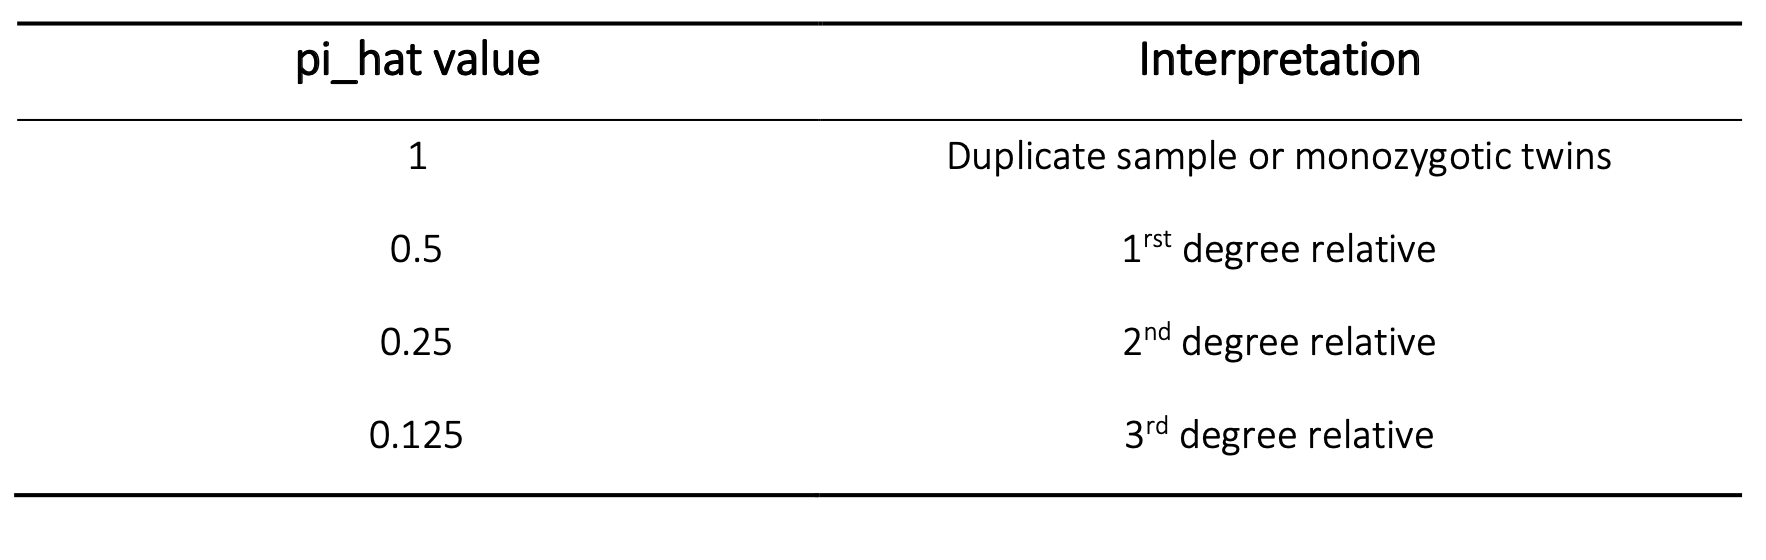

In [ ]:
%%R
print(paste0("Dimesions of genome dataframe is .. ", dim(genome)[1], " rows and ", dim(genome)[2], " columns, having the following column names:")); names(genome)
print(genome[1:3,]); print(summary(genome$PI_HAT))


In [ ]:
%%R
#Plotting the PIHATs in rank order

sorted_PI_HAT <- sort(genome$PI_HAT)
plot(sorted_PI_HAT, main= file, xlab= "rank order of PI_HAT", ylab = "PI_HAT")
abline(h=0.2,col=2,lty=3)


In [ ]:
%%R

#subsetting out the duplicates (PH_HAT > 0.9)
w_PiHat_above_thresh <- which(genome$PI_HAT > 0.9)
print(length(w_PiHat_above_thresh));print(head(w_PiHat_above_thresh))

PiHat_above_thresh <- genome[w_PiHat_above_thresh,]
dupnumber <- dim(PiHat_above_thresh)[1]


In [ ]:
%%R

# With the duplicates excluded (PI_HAT>0.9) what is the range for the remaining comparisons?
PiHat_below_thresh <- genome[-w_PiHat_above_thresh,]

print(range(PiHat_below_thresh$PI_HAT)) # taking min and max values


In [ ]:
%%R
#Numbering the duplicate pairs and writing the file out for excel:
PiHat_above_thresh$Dup <- (1:nrow(PiHat_above_thresh))

# export file
write.table(PiHat_above_thresh,
            file=paste0(dupnumber, "_", Cohort,  "_PI_HATmore0.9.txt"),
            sep="\t",
            col.names=TRUE,
            row.names=FALSE,
            quote=FALSE)


In [ ]:
%%R
#subsetting out the duplicates (PH_HAT > 0.2)
wPiHat_more_point_two <- which(genome$PI_HAT > 0.2)

#print(length(wPiHat_more_point_two)); print(head(wPiHat_more_point_two))


PiHat_more_point_two <- genome[wPiHat_more_point_two,]
dupnumber <- dim(PiHat_more_point_two)[1]

PiHatless_more_point_two <- genome[-wPiHat_more_point_two,]
print(range(PiHatless_more_point_two$PI_HAT))

PiHat_more_point_two$Dup <- (1:nrow(PiHat_more_point_two))

# export file
write.table(PiHat_more_point_two,
            file=paste0(dupnumber, "_", Cohort,  "_PI_HAT_more_point_two"),
            sep="\t",
            col.names=T,
            row.names=F,
            quote=F)




## ETHNICITY - Merging with 1000 genomes file          

In [ ]:
%%R
# -----------------------------------------------------------------------------------------------------------------#
#      (5)   ETHNICITY           Merged with 1000 genomes file                                                     #
# -----------------------------------------------------------------------------------------------------------------#

Cohort <- "VSS-1Kg"
r_file <- "VSS-1Kg-chr1-22-mafgte0.01-noCR-LDpruned0.2-genome-mds.mds"
genome <- read.table(paste(r_file), header=TRUE, fill=T)

print(genome[1:3,]); dim(genome) # 1630 individuals and 10 principal components (PCAs)

In [ ]:
%%R
# Read Reference dataset information

pop_info <- read.table(paste("Populationfile-1kg.txt", sep="/"),
                       sep="\t",
                       header=TRUE, fill=T)

# see what pop info has:
print(pop_info[1:3,]); table(pop_info$Population)

In [ ]:
%%R

# Merge the Reference Dataset with the real data:
genome_popinfo <- merge(genome, pop_info, by.x = "FID", by.y = "ID", all.x = TRUE)

print(genome_popinfo[1:3,])

# export the file
write.table(genome_popinfo,
            file="Genome_Popinfo.txt",
            sep="\t",
            col.names=T,
            row.names=F,
            quote=F)


In [ ]:
%%R
# -----------------------------------------------------------------------------------------------------------------#
#      (5)   ETHNICITY           Merged with 1000 genomes file: Plotting the                                       #
# -----------------------------------------------------------------------------------------------------------------#


Graph_title <- paste(Cohort,chip, "vs 1000genomes", sep=" ")

#Plotting C1 and C2 - subsetting by population

# that is the basic plot
plot(genome_popinfo$C1, genome_popinfo$C2, col="white", main= Graph_title , xlab="Component 1", ylab="Component 2") #change to white for plot


# these are the additional Layers adding on top one after the other:


temp <- subset(genome_popinfo, genome_popinfo$Population=="ASW") # HapMap African ancestry individuals from SW US
points(temp$C1, temp$C2, col="darkolivegreen3", pch=2)

temp <- subset(genome_popinfo, genome_popinfo$Population=="LWK") # (LWK) Luhya individuals
points(temp$C1, temp$C2, col="forestgreen")

temp <- subset(genome_popinfo, genome_popinfo$Population=="YRI") # (YRI) Yoruba individuals
points(temp$C1, temp$C2, col="chartreuse3")

temp <- subset(genome_popinfo, genome_popinfo$Population=="CHB") # (CHB) Han Chinese in Beijing
points(temp$C1, temp$C2, col="darkblue")

temp <- subset(genome_popinfo, genome_popinfo$Population=="CHS")# (CHS) Han Chinese South
points(temp$C1, temp$C2, col="deepskyblue")

temp <- subset(genome_popinfo, genome_popinfo$Population=="JPT")# JPT Japanese individuals
points(temp$C1, temp$C2, col="darkslategray1")

temp <- subset(genome_popinfo, genome_popinfo$Population=="CLM")# Colombian in Medellin, Colombia
points(temp$C1, temp$C2, col="mediumpurple4")

temp <- subset(genome_popinfo, genome_popinfo$Population=="PUR")# Puerto Rican in Puerto Rico
points(temp$C1, temp$C2, col="mediumpurple1")

temp <- subset(genome_popinfo, genome_popinfo$Population=="MXL")# HapMap Mexican individuals from LA California
points(temp$C1, temp$C2, col="mediumorchid1")

temp <- subset(genome_popinfo, genome_popinfo$Population=="CEU")# CEPH individuals
points(temp$C1, temp$C2, col="mediumvioletred")

temp <- subset(genome_popinfo, genome_popinfo$Population=="TSI")# Toscan individuals
points(temp$C1, temp$C2, col="yellow")

temp <- subset(genome_popinfo, genome_popinfo$Population=="FIN")# HapMap Finnish individuals from Finland
points(temp$C1, temp$C2, col="pink1")

temp <- subset(genome_popinfo, genome_popinfo$Population=="IBS")# Iberian populations in Spain
points(temp$C1, temp$C2, col="orange")

temp <- subset(genome_popinfo, genome_popinfo$Population=="GBR")# British individuals from England and Scotland (GBR)
points(temp$C1, temp$C2, col="lightsalmon3")

temp <- subset(genome_popinfo, genome_popinfo$Population=="VSS")#data = VSS samples
points(temp$C1, temp$C2, col="red", pch=16, cex=0.4)


legend("topleft", c("ASW","LWK","YRI","CHB","CHS","JPT","CLM","PUR","MXL","CEU","TSI","FIN","IBS","GBR","VSS"),
       pch=c(2,1,1,1,1,1,1,1,1,1,1,1,1,1,16),
       col=c("darkolivegreen3","forestgreen","chartreuse3","darkblue","deepskyblue","darkslategray1","mediumpurple4","mediumpurple1",
             "mediumorchid1","mediumvioletred","yellow","pink1","orange","lightsalmon3","red"))


In [ ]:
%%R

# ---------------------------------------------------------------------------------------------------------------------------#
#      TASK: Identify the outliers, remove them from the population file (Populationfile-1kg_rmoutliers.txt) and plot again  #
# ---------------------------------------------------------------------------------------------------------------------------#

# Tip: Can you do this by using this file  Populationfile-1kg_rmoutliers.txt



















In [ ]:
#@title Solution
%%R
# SOLUTION
pop_info <- read.table(paste("Populationfile-1kg_rmoutliers.txt", sep="/"), sep="\t", header=TRUE, fill=T)
genome_popinfo <- merge(genome, pop_info, by.x = "FID", by.y = "ID", all.x = TRUE)

plot(genome_popinfo$C1, genome_popinfo$C2, col="white", main= Graph_title , xlab="Component 1", ylab="Component 2") #change to white for plot
temp <- subset(genome_popinfo, genome_popinfo$Population=="ASW") # HapMap African ancestry individuals from SW US
points(temp$C1, temp$C2, col="darkolivegreen3", pch=2)
temp <- subset(genome_popinfo, genome_popinfo$Population=="LWK") # (LWK) Luhya individuals
points(temp$C1, temp$C2, col="forestgreen")
temp <- subset(genome_popinfo, genome_popinfo$Population=="YRI") # (YRI) Yoruba individuals
points(temp$C1, temp$C2, col="chartreuse3")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CHB") # (CHB) Han Chinese in Beijing
points(temp$C1, temp$C2, col="darkblue")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CHS")# (CHS) Han Chinese South
points(temp$C1, temp$C2, col="deepskyblue")
temp <- subset(genome_popinfo, genome_popinfo$Population=="JPT")# JPT Japanese individuals
points(temp$C1, temp$C2, col="darkslategray1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CLM")# Colombian in Medellin, Colombia
points(temp$C1, temp$C2, col="mediumpurple4")
temp <- subset(genome_popinfo, genome_popinfo$Population=="PUR")# Puerto Rican in Puerto Rico
points(temp$C1, temp$C2, col="mediumpurple1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="MXL")# HapMap Mexican individuals from LA California
points(temp$C1, temp$C2, col="mediumorchid1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="CEU")# CEPH individuals
points(temp$C1, temp$C2, col="mediumvioletred")
temp <- subset(genome_popinfo, genome_popinfo$Population=="TSI")# Toscan individuals
points(temp$C1, temp$C2, col="yellow")
temp <- subset(genome_popinfo, genome_popinfo$Population=="FIN")# HapMap Finnish individuals from Finland
points(temp$C1, temp$C2, col="pink1")
temp <- subset(genome_popinfo, genome_popinfo$Population=="IBS")# Iberian populations in Spain
points(temp$C1, temp$C2, col="orange")
temp <- subset(genome_popinfo, genome_popinfo$Population=="GBR")# British individuals from England and Scotland (GBR)
points(temp$C1, temp$C2, col="lightsalmon3")
temp <- subset(genome_popinfo, genome_popinfo$Population=="VSS")#data = VSS samples
points(temp$C1, temp$C2, col="red", pch=16, cex=0.4)
legend("topleft", c("ASW","LWK","YRI","CHB","CHS","JPT","CLM","PUR","MXL","CEU","TSI","FIN","IBS","GBR","VSS"), pch=c(2,1,1,1,1,1,1,1,1,1,1,1,1,1,16), col=c("darkolivegreen3","forestgreen","chartreuse3","darkblue","deepskyblue","darkslategray1","mediumpurple4","mediumpurple1","mediumorchid1","mediumvioletred","yellow","pink1","orange","lightsalmon3","red"))


In [ ]:

# Last step: Combine all outliers' files and exclude them from your data

!./plink --bfile VSS --remove Final_exclusionlist.txt --make-bed --out VSS_sampleQCed


# Variant QC
Variant QC

It consists of (at least) four steps:

- Identification of variants with an excessive missing genotype
- Identification of variants demonstrating a significant deviation from Hardy-Weinberg equilibrium (HWE)
- Removal of all makers with a very low minor allele frequency
- Removal of all makers with cluster separation score $<0.4$


________________

The criteria used to filter out low quality markers differ from study to study Variant QC must be done with great care as every removed marker is potentially a missed disease variant Imputation can be used to recover some of the excluded markers

Here we are using the following thresholds:

> $Call \ Rate < 98$%


> $Hwe = p <=1x10-4$

> $MAF = 1$ %

> Cluster separation score $<=0.4$



In [ ]:
# ---------------------------------------------------------------------------------------------------------------------------#
#      TASK: Q: Can you run the plink command for all these thresholds:                                                      #
# ---------------------------------------------------------------------------------------------------------------------------#
# Tip: Samples with cluster seperation score<=0.4 are saved into a filename called cluster_sep_scr_to-exclude.txt





In [ ]:
#@title Solution

!./plink --bfile VSS_sampleQCed --geno 0.02 --hwe 0.0001 --exclude cluster_sep_scr_to-exclude.txt --maf 0.01 --make-bed --out VSS_sampleQCed_variantQCed


## Resources & References:

- [A tutorial on conducting genome‐wide association studies: Quality control and statistical analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6001694/)

- [The International HapMap Project](https://pubmed.ncbi.nlm.nih.gov/14685227/)

- [An integrated map of genetic variation from 1,092 human genomes](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3498066/)


- [Genomics Boot Camp](https://genomicsbootcamp.github.io/book/)
